## Read in the training and test data

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd '/content/drive/Shared drives/SI 670 Project'

In [2]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm

train = pd.read_csv ('data/WikiLarge_Train.csv')
test = pd.read_csv ('data/WikiLarge_Test.csv')
train_df = train.copy()
test_df = test.copy()
# shuffle the training data
train_df = train_df.sample(frac = 1)

In [3]:
train_df.head()

,original_text,label
226399,Placebo is an alternative rock band that start...,0
130348,Vendays-Montalivet is a commune in the Gironde...,1
391981,"For example , if the angle between the road an...",0
216011,It is also used in electrolytic cells to carry...,0
300337,Fluorescent lamp,0


In [4]:
test_df.head()

,id,original_text,label
0,0,-2011,NaN
1,1,-2011,NaN
2,2,-2000,NaN
3,3,-1997,NaN
4,4,1.636,NaN


In [5]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

## Data prepocessing and feature extraction

We create two kind of features: numerical feature and numerical feature 

### Numerical feature
We create some numerical features by calculating some summary statistics after combining training dataset with other files.

#### 1.1 Generate percentage of frequently used words for each sentence in training data

In [ ]:
# Create the frequency word wordset list from dale_chall.txt
frequency_wordset_df = pd.read_csv('data/dale_chall.txt', sep="\n", header=None)
frequency_wordset = list(frequency_wordset_df[0])

# Generate percentage of frequently used words for each sentence in training data
def frequency_word_percentage(sentence):
  word_list = sentence.split(" ")
  count = 0
  for i in word_list:
    if i in frequency_wordset:
      count += 1
  return count/len(word_list)

fre_perc_list = []
for i in tqdm(range(len(train_df))):
  sentence = train_df.iloc[i]["original_text"]
  fre_perc_list.append(frequency_word_percentage(sentence))

# Display and save percentage of frequently used words as a numerical feature
train_df["frequency word percentage"] = fre_perc_list
train_df.to_csv("train_fwp.csv")
train_df.head()

In [7]:
train_fwp = pd.read_csv("data/train_fwp.csv",index_col=0)
train_fwp.head()

,original_text,label,frequency word percentage
0,There is manuscript evidence that Austen conti...,1,0.465116
1,"In a remarkable comparative analysis , Mandaea...",1,0.217391
2,"Before Persephone was released to Hermes , who...",1,0.543478
3,Cogeneration plants are commonly found in dist...,1,0.256410
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,0.361111


#### 1.2 Generate mean concreteness and mean unknown percentage of each sentence

In [ ]:
# Create the concreteness/unknown percentage list from Concreteness_ratings_Brysbaert_et_al_BRM.txt
concreteness_df = pd.read_csv("data/Concreteness_ratings_Brysbaert_et_al_BRM.txt", sep="\t")

# Generate mean concreteness and mean unknown percentage of each sentence in training data
concreteness_dict = {}
for i in tqdm(range(len(concreteness_df))):
  word = concreteness_df.iloc[i]["Word"]
  if word not in concreteness_dict:
    concreteness_dict[word] = {}
  concreteness_dict[word]["conc_m"] = concreteness_df.iloc[i]["Conc.M"]
  concreteness_dict[word]["percent_unknow"] = 1 - concreteness_df.iloc[i]["Percent_known"]

def check_difficulty(sentence):
  word_list = sentence.split(" ")
  count = 0
  conc = []
  unknow = []
  for i in word_list:
    if i in concreteness_dict:
      count += 1
      conc.append(concreteness_dict[i]["conc_m"])
      unknow.append(concreteness_dict[i]["percent_unknow"])
  if conc != [] and unknow != []:
    mean_conc = sum(conc) / len(conc)
    mean_unknow = sum(unknow) / len(unknow)
  else:
    mean_conc = float(-100)
    mean_unknow = float(-100)
  return [mean_conc,mean_unknow]

train_fwp = pd.read_csv("data/train_fwp.csv",index_col=0)
train_df1 = train_fwp.copy()
conc_all = []
mean_conc = []
unknow_all = []
mean_unknow = []
for i in tqdm(range(len(train_df1))):
  sentence = train_df1.iloc[i]["original_text"]
  diff = check_difficulty(sentence)
  s_conc = diff[0]
  s_unknow = diff[1]
  conc_all.append(s_conc)
  unknow_all.append(s_unknow)
  if s_conc != -100 and s_unknow != -100:
    mean_conc.append(s_conc)
    mean_unknow.append(s_unknow)
mean_conc_all = sum(mean_conc) / len(mean_conc) 
mean_unknow_all = sum(mean_unknow) / len(mean_unknow)

for i in range(len(conc_all)):
  if conc_all[i] == -100:
    conc_all[i] = mean_conc_all

for i in range(len(unknow_all)):
  if unknow_all[i] == -100:
    unknow_all[i] = mean_unknow_all

# Display and save mean concreteness and mean unknown percentage as a numerical feature
train_df1["mean_concretness"] = conc_all
train_df1["mean_unknow_percentage"] = unknow_all
train_df1.to_csv("data/train_fwp_cu.csv")
train_df1.head()

100%|██████████| 416768/416768 [01:42<00:00, 4080.51it/s]


,original_text,label,frequency word percentage,mean_concretness,mean_unknow_percentage
0,There is manuscript evidence that Austen conti...,1,0.465116,2.360769,0.004231
1,"In a remarkable comparative analysis , Mandaea...",1,0.217391,2.037273,0.006364
2,"Before Persephone was released to Hermes , who...",1,0.543478,2.369697,0.006364
3,Cogeneration plants are commonly found in dist...,1,0.256410,2.997143,0.006667
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,0.361111,2.364667,0.010667


In [8]:
train_fwp_cu = pd.read_csv("data/train_fwp_cu.csv",index_col=0)
train_fwp_cu.head()

,original_text,label,frequency word percentage,mean_concretness,mean_unknow_percentage
0,There is manuscript evidence that Austen conti...,1,0.465116,2.360769,0.004231
1,"In a remarkable comparative analysis , Mandaea...",1,0.217391,2.037273,0.006364
2,"Before Persephone was released to Hermes , who...",1,0.543478,2.369697,0.006364
3,Cogeneration plants are commonly found in dist...,1,0.256410,2.997143,0.006667
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,0.361111,2.364667,0.010667


#### 1.3 Generate mean AoA of each sentence

In [ ]:
# Create the AoA list from AoA_51715_words.csv
aoa_df = pd.read_csv("data/AoA_51715_words.csv", encoding= 'unicode_escape')
aoa_df["AoA_Kup_lem"].isna().sum() / len(aoa_df)
aoa_df = aoa_df.dropna(subset=["Word", "AoA_Kup_lem"])

# Generate  mean AoA of each sentence in training data
aoa_dict = {}
for i in tqdm(range(len(aoa_df))):
  word = aoa_df.iloc[i]["Word"]
  aoa = aoa_df.iloc[i]["AoA_Kup_lem"]
  aoa_dict[word] = aoa

def mean_aoa(sentence):
  word_list = sentence.split(" ")
  aoa_list = []
  for i in word_list:
    if i in aoa_dict:
      aoa_list.append(aoa_dict[i])
  if aoa_list != []:
    mean_aoa = sum(aoa_list) / len(aoa_list)
  else:
    mean_aoa = float(-100)
  return mean_aoa

train_fwp_cu = pd.read_csv("data/train_fwp_cu.csv",index_col=0)
train_df2 = train_fwp_cu.copy()

aoa_all = []
mean_aoa_list = []
for i in tqdm(range(len(train_df2))):
  sentence = train_df2.iloc[i]["original_text"]
  aoa = mean_aoa(sentence)
  aoa_all.append(aoa)
  if aoa != -100:
    mean_aoa_list.append(aoa)
mean_aoa_all = sum(mean_aoa_list) / len(mean_aoa_list) 

for i in range(len(aoa_all)):
  if aoa_all[i] == -100:
    aoa_all[i] = mean_aoa_all

# Display and save mean AoA as a numerical feature
train_df2["mean_aoa"] = aoa_all
train_df2.to_csv("data/train_fwp_cu_aoa.csv")
train_df2.head()

#### 1.4 Display numerical features

In [9]:
df_numeric1 = pd.read_csv("data/train_fwp_cu_aoa.csv",index_col=0)
df_numeric = df_numeric1.copy()
df_numeric.head()

,original_text,label,frequency word percentage,mean_concretness,mean_unknow_percentage,mean_aoa
0,There is manuscript evidence that Austen conti...,1,0.465116,2.360769,0.004231,5.947857
1,"In a remarkable comparative analysis , Mandaea...",1,0.217391,2.037273,0.006364,7.711667
2,"Before Persephone was released to Hermes , who...",1,0.543478,2.369697,0.006364,5.318611
3,Cogeneration plants are commonly found in dist...,1,0.256410,2.997143,0.006667,6.738889
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,0.361111,2.364667,0.010667,5.396667


### Text feature
We first split up a larger body of text into words called tokens. Then we use word embedding as a vector which represents the features of these tokens and use the vectors as the features to classify the sentences.

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 20
max_features = 24

# Load data
dataset_train = train_df.values
X_train = dataset_train[:, 0]
y_train = dataset_train[:, 1]
y_train = np.asarray(y_train).astype(np.int32)
text_train = X_train.reshape(-1)
tokenizer = Tokenizer(num_words=max_features, lower=True)
## fit on train/test
tokenizer.fit_on_texts(text_train)
sequences_train = tokenizer.texts_to_sequences(text_train)
# Pad sequences
input_train = pad_sequences(sequences_train, maxlen=maxlen)
print('input_train shape:', input_train.shape)

input_train shape: (416768, 20)


## Methods and Evaluation
We first fit two baseline models: 
(a) dummy classifier baseline and
(b) a simple method baseline i.e, Naive Bayes

We then fit three different supervised learning
models: K nearest-neighbor, tree-based methods and LSTM. The first two models use numerical features and the last model use text features.

We use 5-fold cross-validation to compare performance of the above three different supervised learning methods.

In [11]:
def get_metrics_score(model_name, scores):
  print(f"{model_name} classifier accuracy: ", np.mean(score_result['test_accuracy']))
  print(f"{model_name} classifier f1: ", np.mean(scores['test_f1']))
  print(f"{model_name} classifier precision: ", np.mean(scores['test_precision']))
  print(f"{model_name} classifier recall: ", np.mean(scores['test_recall']))
  return np.mean(score_result['test_accuracy']), np.mean(scores['test_f1']), np.mean(scores['test_precision']), np.mean(scores['test_recall'])
scorings = ['accuracy','f1', 'precision', 'recall']

#### 1 Dummy classifier

In [12]:
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

X, y = df_numeric.iloc[:, 2:], df_numeric.iloc[:, 1]
dummy_clf = DummyClassifier(strategy="most_frequent")
score_result = cross_validate(dummy_clf, X, y, scoring=scorings, cv = 5, verbose=2)
dummy_result = get_metrics_score("Dummy Classifier", score_result)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.5s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
Dummy Classifier classifier accuracy:  0.49999760056626635
Dummy Classifier classifier f1:  0.13333226691407593
Dummy Classifier classifier precision:  0.09999880028313318
Dummy Classifier classifier recall:  0.2


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished


#### 2 Naive Bayes classifier

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = df_numeric.iloc[:, 2:], df_numeric.iloc[:, 1]
nb = GaussianNB()
score_result = cross_validate(nb, X, y, scoring=scorings, cv = 5, verbose=2)
nb_result = get_metrics_score("Naive Bayes", score_result)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
Naive Bayes classifier accuracy:  0.5845842266197705
Naive Bayes classifier f1:  0.650144779233643
Naive Bayes classifier precision:  0.5615283029174232
Naive Bayes classifier recall:  0.7719786622776463


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished


#### 3  K nearest-neighbor classifier
We train a K nearest-neighbor classifier using numerical features of training data.

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# find optimal k
X = df_numeric.iloc[:,2:6]
y = df_numeric.iloc[:,1]

# define the pipeline
acc_lst = []
for i in range(1, 20):
  steps = list()
  steps.append(('scaler', StandardScaler()))
  steps.append(('model', KNeighborsClassifier(n_neighbors = i)))
  pipeline = Pipeline(steps=steps)
  
  # evaluate the model using 5-fold cross validation
  cv = KFold(n_splits = 5)
  acc_lst.append(np.mean(cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))

Text(0, 0.5, 'Mean Accuracy')

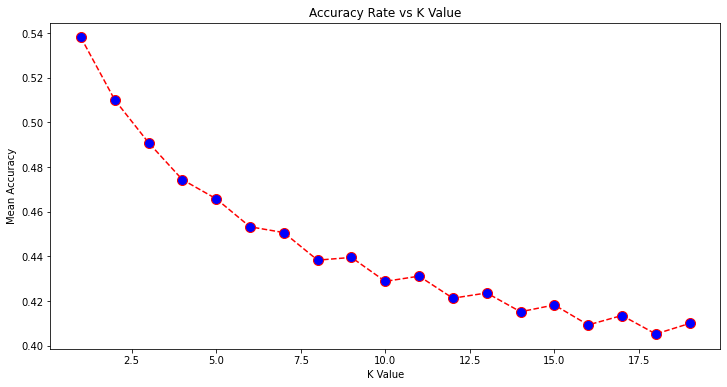

In [ ]:
import matplotlib.pyplot as plt
# plot k vs. accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), acc_lst, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')

In [ ]:
# define the pipeline with optimal k
steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', KNeighborsClassifier(n_neighbors = 1)))
pipeline = Pipeline(steps=steps)

score_result = cross_validate(pipeline, X, y, scoring=scorings, cv = 5, verbose=2)
knn_result = get_metrics_score("KNN", score_result)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   6.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV] END .................................................... total time=   5.9s
[CV] END .................................................... total time=   5.8s
[CV] END .................................................... total time=   5.9s
[CV] END .................................................... total time=  10.9s
KNN classifier accuracy:  0.6205178943366697
KNN classifier f1:  0.6422007789660649
KNN classifier precision:  0.6074975889725132
KNN classifier recall:  0.6811127495722265


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   34.7s finished


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


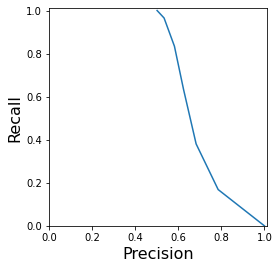

In [ ]:
# Display precision recall curve of knn
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

X = df_numeric.iloc[:,2:6]
y = df_numeric.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Normalize the feature
scaler = StandardScaler()
columns = X_train.columns
standardized_X_train = X_train.copy()
standardized_X_test = X_test.copy()
standardized_X_train[columns] = scaler.fit_transform(X_train[columns])
standardized_X_test[columns] = scaler.transform(X_test[columns])

# Train K nearest-neighbor classifer with K = 5 tree classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(standardized_X_train, y_train)

#use decision tree model to make predictions
y_scores_knn = knn.fit(X_train, y_train).predict_proba(X_test)[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_knn)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

#display plot
plt.show()

#### 4 Decision tree classifer
We train a tree-based classifer using numerical features of training data.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X = df_numeric.iloc[:,2:6]
y = df_numeric.iloc[:,1]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train a decision tree classifier
DT_classifier = DecisionTreeClassifier(random_state=0)
# acc_DT = cross_val_score(DT_classifier, X, y, scoring='accuracy', cv = 5)
# f1_DT = cross_val_score(DT_classifier, X, y, scoring='f1', cv = 5)
# precision_DT = cross_val_score(DT_classifier, X, y, scoring='precision', cv = 5)
# recall_DT = cross_val_score(DT_classifier, X, y, scoring='recall', cv = 5)
# print("Decision tree classifier accuracy: ", np.mean(acc_DT))
# print("Decision tree classifier f1 score: ", np.mean(f1_DT))
# print("Decision tree classifier precision: ", np.mean(precision_DT))
# print("Decision tree classifier recall: ", np.mean(recall_DT))

score_result = cross_validate(DT_classifier, X, y, scoring=scorings, cv = 5, verbose=2)
dt_result = get_metrics_score("Decision Tree", score_result)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   2.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   2.5s
Decision Tree classifier accuracy:  0.6657684831872397
Decision Tree classifier f1:  0.658127024757907
Decision Tree classifier precision:  0.673526367431695
Decision Tree classifier recall:  0.6434179191398137


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.6s finished


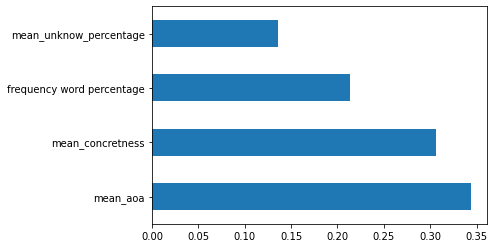

In [ ]:
# Display feature importance of one trial
DT_classifier.fit(X_train, y_train)
(pd.Series(DT_classifier.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


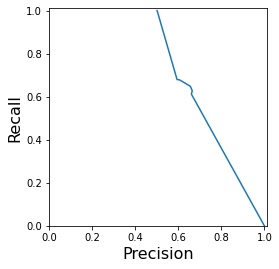

In [ ]:
# Display precision recall curve of decision tree
#use decision tree model to make predictions
y_scores_dt = DT_classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_dt)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

#display plot
plt.show()

#### 5 LSTM
We train an LSTM classifer using text features of training data.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 40
max_features = 20000

# Process training data
dataset_train = train_df.values
X_train = dataset_train[:, 0].reshape(-1)
y_train = dataset_train[:, 1]
y_train = np.asarray(y_train).astype(np.float32)
tokenizer = Tokenizer(num_words=max_features, lower=True)
## covert tokens to sequences
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
## Pad sequences
input_train = pad_sequences(sequences_train, maxlen=maxlen)
print('input_train shape:', input_train.shape)

input_train shape: (416768, 40)


Epoch 1/10
163/163 [==============================] - 8s 33ms/step - loss: 0.6806 - acc: 0.5568 - mse: 0.2438 - mae: 0.4881 - val_loss: 0.6650 - val_acc: 0.5993 - val_mse: 0.2362 - val_mae: 0.4738
Epoch 2/10
163/163 [==============================] - 4s 24ms/step - loss: 0.6641 - acc: 0.6043 - mse: 0.2357 - mae: 0.4719 - val_loss: 0.6622 - val_acc: 0.6074 - val_mse: 0.2348 - val_mae: 0.4731
Epoch 3/10
163/163 [==============================] - 4s 24ms/step - loss: 0.6635 - acc: 0.6035 - mse: 0.2355 - mae: 0.4708 - val_loss: 0.6643 - val_acc: 0.6081 - val_mse: 0.2358 - val_mae: 0.4765
Epoch 4/10
163/163 [==============================] - 4s 24ms/step - loss: 0.6636 - acc: 0.6042 - mse: 0.2355 - mae: 0.4710 - val_loss: 0.6614 - val_acc: 0.6093 - val_mse: 0.2344 - val_mae: 0.4679
Epoch 5/10
163/163 [==============================] - 4s 24ms/step - loss: 0.6630 - acc: 0.6046 - mse: 0.2352 - mae: 0.4705 - val_loss: 0.6612 - val_acc: 0.6087 - val_mse: 0.2343 - val_mae: 0.4671
Epoch 6/10
163/

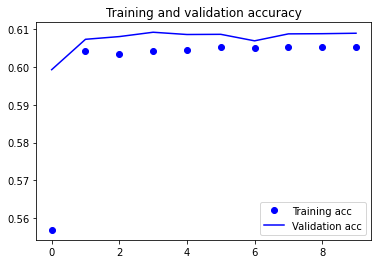

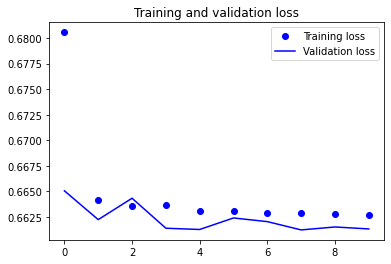

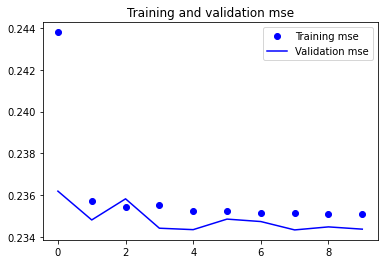

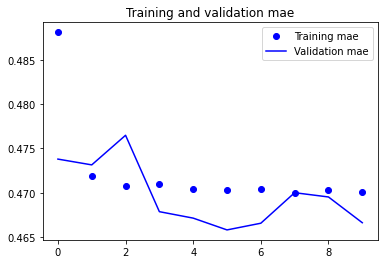

6512/6512 - 29s - loss: 0.6820 - acc: 0.5844 - mse: 0.2439 - mae: 0.4684 - 29s/epoch - 4ms/step
Epoch 1/10
163/163 [==============================] - 7s 29ms/step - loss: 0.6976 - acc: 0.5070 - mse: 0.2521 - mae: 0.4998 - val_loss: 0.6916 - val_acc: 0.5520 - val_mse: 0.2492 - val_mae: 0.4992
Epoch 2/10
163/163 [==============================] - 4s 24ms/step - loss: 0.6700 - acc: 0.5946 - mse: 0.2386 - mae: 0.4783 - val_loss: 0.6636 - val_acc: 0.6026 - val_mse: 0.2355 - val_mae: 0.4713
Epoch 3/10
163/163 [==============================] - 4s 24ms/step - loss: 0.6639 - acc: 0.6043 - mse: 0.2357 - mae: 0.4713 - val_loss: 0.6629 - val_acc: 0.6042 - val_mse: 0.2351 - val_mae: 0.4707
Epoch 4/10
163/163 [==============================] - 4s 24ms/step - loss: 0.6634 - acc: 0.6053 - mse: 0.2354 - mae: 0.4708 - val_loss: 0.6625 - val_acc: 0.6070 - val_mse: 0.2350 - val_mae: 0.4702
Epoch 5/10
163/163 [==============================] - 4s 24ms/step - loss: 0.6634 - acc: 0.6049 - mse: 0.2354 - mae:

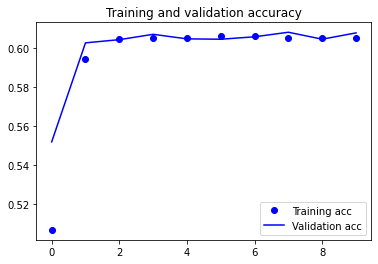

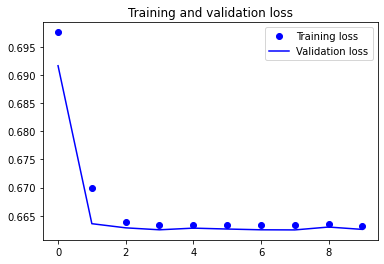

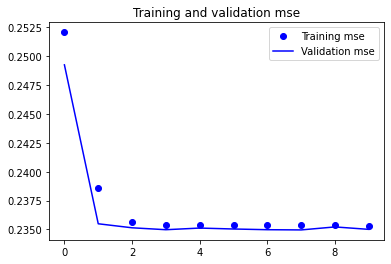

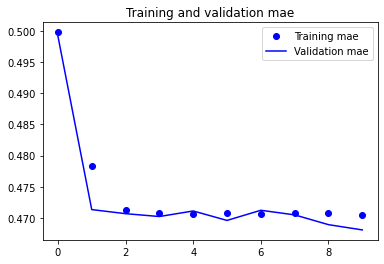

6512/6512 - 29s - loss: 0.6791 - acc: 0.5881 - mse: 0.2426 - mae: 0.4673 - 29s/epoch - 4ms/step
LSTM loss:  0.6805601119995117
LSTM accuracy:  0.586254209280014
LSTM MSE:  0.2432592809200287
LSTM: MAE  0.4678661376237869


In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

X = input_train
y = y_train
# define 5-fold cross validation test harness
kfold = KFold(n_splits=2)
loss_list = []
acc_list = []
mse_list = []
mae_list = []
for train, test in kfold.split(X, y):
  model = Sequential()
  model.add(Embedding(max_features, 64))
  model.add(LSTM(64))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc','mse','mae'])
  history = model.fit(X[train], y[train],
                      epochs=10,
                      batch_size=1024,
                      validation_split=0.2,
                      validation_data=(X[test],y[test]))
  
  # display the training and validation loss, accuracy, mse, mae
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  mse = history.history['mse']
  val_mse = history.history['val_mse']
  mae = history.history['mae']
  val_mae = history.history['val_mae']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.figure()

  plt.plot(epochs, mse, 'bo', label='Training mse')
  plt.plot(epochs, val_mse, 'b', label='Validation mse')
  plt.title('Training and validation mse')
  plt.legend()

  plt.figure()

  plt.plot(epochs, mae, 'bo', label='Training mae')
  plt.plot(epochs, val_mae, 'b', label='Validation mae')
  plt.title('Training and validation mae')
  plt.legend()

  plt.show()


  scores = model.evaluate(X[test], y[test], verbose=2)
  loss_list.append(scores[0])
  acc_list.append(scores[1])
  mse_list.append(scores[2])
  mae_list.append(scores[3])

# print mean value of evaluatio metrics
print("LSTM loss: ", np.mean(loss_list))
print("LSTM accuracy: ", np.mean(acc_list))
print("LSTM MSE: ", np.mean(mse_list))
print("LSTM: MAE ", np.mean(mae_list))

In [ ]:
batch_df = pd.DataFrame()
# batch_columns = ["Loss", "Accuracy", "MSE", "MAE"]
batch_df["1024"] = [0.681, 0.586, 0.243, 0.468]
batch_df["512"] = [0.679, 0.585, 0.243, 0.469]
batch_df["256"] = [0.682, 0.584, 0.244, 0.469]
batch_df["128"] = [0.684, 0.582, 0.245, 0.469]
batch_df1 = batch_df.T.rename(columns={0:"Loss", 1:"Accuracy", 2:"MSE", 3:"MAE"})
batch_df1

,Loss,Accuracy,MSE,MAE
1024,0.681,0.586,0.243,0.468
512,0.679,0.585,0.243,0.469
256,0.682,0.584,0.244,0.469
128,0.684,0.582,0.245,0.469


##### Predict with both text and numeric data

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, concatenate
from keras import Input, Model

seq_length = maxlen
nlp_input = Input(shape=(seq_length,)) 
meta_input = Input(shape=(4,))
emb = Embedding(output_dim=24, input_dim=20, input_length=seq_length)(nlp_input) 
nlp_out = Bidirectional(LSTM(128))(emb) 
concat = concatenate([nlp_out, meta_input]) 
classifier = Dense(32, activation='relu')(concat) 
output = Dense(1, activation='sigmoid')(classifier) 
model = Model(inputs=[nlp_input , meta_input], outputs=[output])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(df_numeric.iloc[:maxlen, 2:])
X_test_numeric = scaler.transform(df_numeric.iloc[maxlen:maxlen*2, 2:])
history = model.fit((input_train[:maxlen], X_train_numeric), y_train[:maxlen],
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2,
                    validation_data=((input_train[:maxlen], X_test_numeric), y_train[maxlen:maxlen*2]))


Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 0.8860 - acc: 0.5042 - val_loss: 0.8878 - val_acc: 0.4833
Epoch 2/5
1/1 [==============================] - 0s 292ms/step - loss: 0.8639 - acc: 0.5042 - val_loss: 0.8631 - val_acc: 0.4833
Epoch 3/5
1/1 [==============================] - 0s 267ms/step - loss: 0.8420 - acc: 0.5042 - val_loss: 0.8374 - val_acc: 0.4833
Epoch 4/5
1/1 [==============================] - 0s 252ms/step - loss: 0.8193 - acc: 0.5042 - val_loss: 0.8091 - val_acc: 0.4833
Epoch 5/5
1/1 [==============================] - 0s 244ms/step - loss: 0.7947 - acc: 0.5042 - val_loss: 0.7767 - val_acc: 0.4833


#### 6 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
X, y = df_numeric.iloc[:, 2:], df_numeric.iloc[:, 1]
# scaler = StandardScaler()
# lr = LogisticRegression(random_state=0)

# define the pipeline
steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', LogisticRegression(random_state=0)))
pipeline = Pipeline(steps=steps)

score_result = cross_validate(pipeline, X, y, scoring=scorings, cv = 5, verbose=2)
lr_result = get_metrics_score("Logistic Regression", score_result)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s
Logistic Regression classifier accuracy:  0.5684505565643486
Logistic Regression classifier f1:  0.5747356254739266
Logistic Regression classifier precision:  0.5664890082478102
Logistic Regression classifier recall:  0.5832357726162114


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished


Feature: 0, Score: 0.16145
Feature: 1, Score: -0.09943
Feature: 2, Score: 0.01397
Feature: 3, Score: 0.26878


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


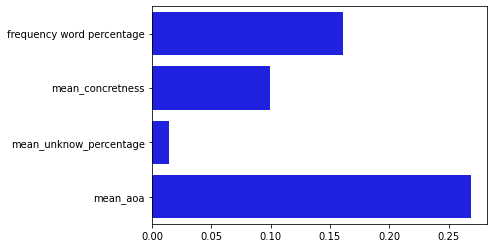

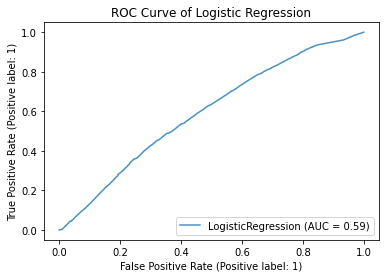

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import seaborn as sns

X, y = df_numeric.iloc[:, 2:], df_numeric.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Display feature importance of one trial
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
sns.barplot(abs(importance),list(X.columns),color="blue")
plt.yticks(fontsize=10)

plt.figure()

ax = plt.gca()
lr_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax, alpha=0.8)
# svc_disp.plot(ax=ax, alpha=0.8)
plt.title(label="ROC Curve of Logistic Regression")
plt.show()

#### 7 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

X = df_numeric.iloc[:,2:6]
y = df_numeric.iloc[:,1]

clf = RandomForestClassifier(random_state=0)
score_result = cross_validate(clf, X, y, scoring=scorings, cv = 5, verbose=2)
rf_result = get_metrics_score("Random Forest", score_result)
rf_result

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 1.7min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] END .................................................... total time= 1.7min
[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 1.6min
Random Forest classifier accuracy:  0.6924955845219098
Random Forest classifier f1:  0.6951359261602572
Random Forest classifier precision:  0.6892199357541875
Random Forest classifier recall:  0.7011574709662041


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.1min finished


(0.6924955845219098,
 0.6951359261602572,
 0.6892199357541875,
 0.7011574709662041)

#### 9 AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate

X = df_numeric.iloc[:,2:6]
y = df_numeric.iloc[:,1]

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

score_result = cross_validate(clf, X, y, scoring=scorings, cv = 5, verbose=2)
AdaBoost_result = get_metrics_score("AdaBoost", score_result)
AdaBoost_result

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  20.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.9s remaining:    0.0s


[CV] END .................................................... total time=  21.5s
[CV] END .................................................... total time=  21.2s
[CV] END .................................................... total time=  21.3s
[CV] END .................................................... total time=  20.4s
AdaBoost classifier accuracy:  0.6210409587428832
AdaBoost classifier f1:  0.6411878413014054
AdaBoost classifier precision:  0.6088196964784068
AdaBoost classifier recall:  0.6771969257641957


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished


(0.6210409587428832,
 0.6411878413014054,
 0.6088196964784068,
 0.6771969257641957)

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# data
X = df_numeric.iloc[:,2:6]
y = df_numeric.iloc[:,1]

# # Binarize the output
# y = label_binarize(y, classes=[0, 1])
# n_classes = y.shape[1]

# Learn to predict each class against the other
classifier = AdaBoostClassifier(n_estimators=100, random_state=0)

# OneVsRestClassifier(
#     svm.SVC(kernel="linear", probability=True, random_state=random_state)
# )
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#### 10 xgboost

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()

score_result = cross_validate(clf, X, y, scoring=scorings, cv = 5, verbose=2)
xgboost_result = get_metrics_score("xgboost", score_result)
xgboost_result

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  11.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.3s remaining:    0.0s


[CV] END .................................................... total time=  11.0s
[CV] END .................................................... total time=  10.9s
[CV] END .................................................... total time=  10.9s
[CV] END .................................................... total time=  11.0s
xgboost classifier accuracy:  0.6290382178350191
xgboost classifier f1:  0.6466454139665537
xgboost classifier precision:  0.6173412964691751
xgboost classifier recall:  0.6788764966766215


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   55.2s finished


(0.6290382178350191,
 0.6466454139665537,
 0.6173412964691751,
 0.6788764966766215)

### Evaluation Result

In [ ]:
eval_df = pd.DataFrame()
eval_df["Dummy"] = dummy_result
eval_df["Naive Bayes"] = nb_result
eval_df["KNN"] = knn_result
eval_df["Decision Tree"] = dt_result
eval_df["Logistic Regression"] = lr_result
eval_df["Random Forest"] = rf_result
eval_df["AdaBoost"] = AdaBoost_result
eval_df["XgBoost"] = xgboost_result
eval_df1 = eval_df.T.rename(columns={0:"Accuracy",1:"F1",2:"Precision",3:"Recall"})

In [ ]:
eval_df1

,Accuracy,F1,Precision,Recall
Dummy,0.499998,0.133332,0.099999,0.200000
Naive Bayes,0.584584,0.650145,0.561528,0.771979
KNN,0.595451,0.623681,0.583000,0.670469
Decision Tree,0.665768,0.658127,0.673526,0.643418
Logistic Regression,0.568451,0.574736,0.566489,0.583236
Random Forest,0.692496,0.695136,0.689220,0.701157
AdaBoost,0.621041,0.641188,0.608820,0.677197
XgBoost,0.629038,0.646645,0.617341,0.678876


In [ ]:
list(eval_df1.columns)


['Accuracy', 'F1', 'Precision', 'Recall']

Text(0.5, 1.0, 'Accuracy of Multiple Models')

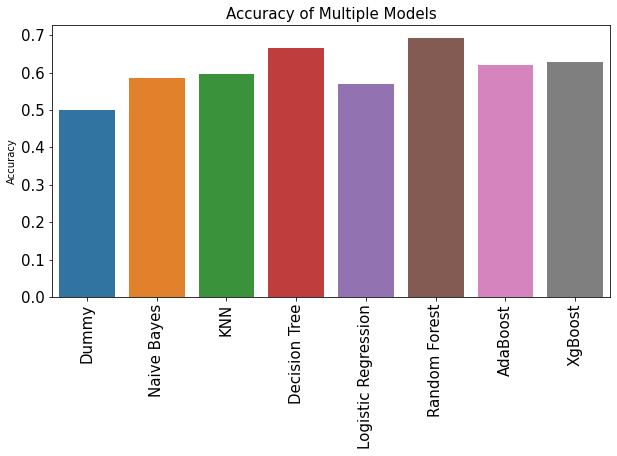

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=list(eval_df1.index), y=eval_df1.Accuracy)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title(label="Accuracy of Multiple Models", fontsize=15)

Text(0.5, 1.0, 'F1 of Multiple Models')

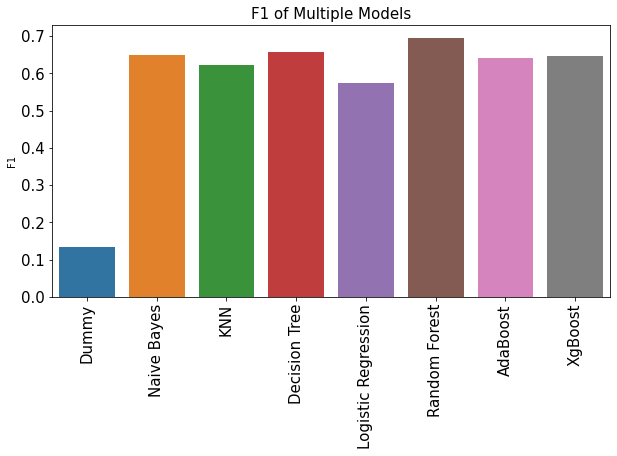

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(eval_df1.index), y=eval_df1.F1)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title(label="F1 of Multiple Models", fontsize=15)

Text(0.5, 1.0, 'Precision of Multiple Models')

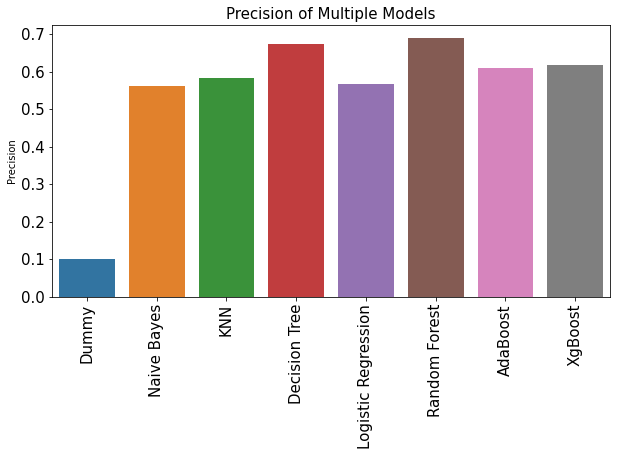

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(eval_df1.index), y=eval_df1.Precision)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title(label="Precision of Multiple Models", fontsize=15)

Text(0.5, 1.0, 'Recall of Multiple Models')

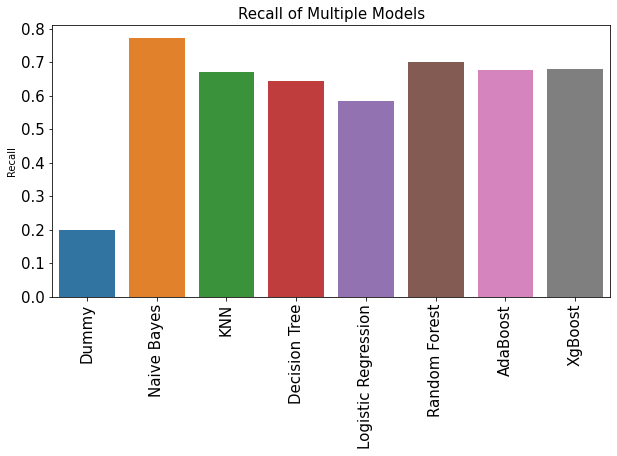

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(eval_df1.index), y=eval_df1.Recall)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title(label="Recall of Multiple Models", fontsize=15)

In [ ]:
# For output >= 0.5 we assign label 1; 0 otherwise
test_int = []
for i in testPredict:
    if i >= 0.5:
        test_int.append(1)
    else:
        test_int.append(0)
# Output results
test_df1 = test_df.copy()
test_df1["label"] = test_int
test_df2 = test_df1[["id","label"]]
test_df2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

X = df_numeric.iloc[:,2:6]
y = df_numeric.iloc[:,1]

clf = RandomForestClassifier(random_state=0, max_depth=10, max_features=3, min_samples_leaf=5, verbose=2)
clf.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=5,
                       random_state=0, verbose=2)

,id,original_text,label,frequency word percentage,mean_concretness,mean_unknow_percentage,mean_aoa
0,0,-2011,NaN,0.0,2.456987,0.006596,5.658503
1,1,-2011,NaN,0.0,2.456987,0.006596,5.658503
2,2,-2000,NaN,0.0,2.456987,0.006596,5.658503
3,3,-1997,NaN,0.0,2.456987,0.006596,5.658503
4,4,1.636,NaN,0.0,2.456987,0.006596,5.658503


In [ ]:
(X, y)

In [ ]:
df_numeric_test = pd.read_csv("")

In [ ]:
df_numeric_test = pd.read_csv("data/test_fwp_cu_aoa.csv",index_col=0)
# df_numeric_test.head()
output_df = test_df[['id']]
output_df['label'] = clf.predict(df_numeric_test.iloc[:,3:7])
output_df.head()

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, clf.predict(X))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


0.6434203201781327

In [ ]:
output_df.to_csv('test_results.csv', index=None)

### Main results
By applying 5-fold cross-validation to compare accuracy of the each upervised learning methods, we notice that LSTM classifier gives the hight accuracy. Therefore, we use LSTM classifier to predict labels for test data.

In [ ]:
# Process test data
dataset_test = test_df.values
X_test = dataset_test[:, 1]
text_test = X_test.reshape(-1)
sequences_test = tokenizer.texts_to_sequences(text_test)
input_test = pad_sequences(sequences_test, maxlen=maxlen)
# Predict using LSTM model
testPredict = model.predict(input_test)
# For output >= 0.5 we assign label 1; 0 otherwise
test_int = []
for i in testPredict:
    if i >= 0.5:
        test_int.append(1)
    else:
        test_int.append(0)
# Output results
test_df1 = test_df.copy()
test_df1["label"] = test_int
test_df2 = test_df1[["id","label"]]
test_df2

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
119087,119087,0
119088,119088,0
119089,119089,0
119090,119090,0
